In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import bk.load
import bk.compute
import bk.signal

In [9]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [10]:
def separate_neuron_types(path):
    bk.load.current_session(path)
    neurons, metadata = bk.load.loadSpikeData(path)
    pyramidal = neurons[metadata['Type']=='Pyr']
    interneurons = neurons[metadata['Type']=='Int']
    other_neurons = neurons[metadata['Type']=='Unk']
    return pyramidal, interneurons, other_neurons

In [4]:
def get_firing_rate_for_specific_state(neurons, state):
    """
    Returns a pandas Series object with the mean firing rate of each of the neurons during a chosen state (REM, sws, drowsy, or wake)
    
    Keyword arguments:
    neurons -- numpy.ndarray containing series data of selected neurons 
    state -- string, should be one of the following: REM, sws, drowsy, wake (default='REM')
    
    Restrictions:
    Can only be called when the neurons and session have already been loaded.
    """
    mean_firing_rates = pd.Series(index = np.arange(len(neurons)),dtype='float64')
    state_used = bk.load.states()[state]
    for i in range(len(neurons)):
        spk_time = neurons[i].restrict(state_used).as_units('ms').index.values
        mean_firing_rates[i] = len(spk_time)/state_used.tot_length('s')
    
    return mean_firing_rates

In [5]:
def get_firing_rate_for_all_states(neurons):
    
    states= bk.load.states()
    possible_states=list(states.keys())
    mean_firing_rates = pd.DataFrame(index = np.arange(len(neurons)),columns=possible_states, dtype='float64')
    g
    for state in possible_states:
        state_used=states[state]
        for i in range(len(neurons)):
            spk_time = neurons[i].restrict(state_used).as_units('ms').index.values
            mean_firing_rates[state][i] = len(spk_time)/state_used.tot_length('s')

    return mean_firing_rates 

In [20]:
def get_FR_per_state_neurontype(path, states):
    '''
    Returns 2 lists (one for each state) with the mean firing rate of each of the types of neurons (Pyramidal, interneurons, unknown) during the chosen state.
    
    Keyword arguments:
    path -- string containing the dircetory where the data files are stored
    states -- list of 2 strings, should be one of the following: REM, sws, drowsy, wake (default='REM')
    '''
    neurons_by_type=separate_neuron_types(path)
    firing_rates_state0=[]
    firing_rates_state1=[]
    for i in neurons_by_type:
        x=get_firing_rate_for_specific_state(i, states[0])
        y=get_firing_rate_for_specific_state(i, states[1])
        firing_rates_state0.append(x)
        firing_rates_state1.append(y)
    return firing_rates_state0, firing_rates_state1

In [7]:
def get_plot_c_all_sessions(paths, states):
    '''
    Returns N lists (one for each state) with the mean firing rate of each of the types of neurons (Pyramidal, interneurons, unknown) during the chosen state
    where N is the number of sessions.
    Returned lists structure = Number of sessions * number of types of cells(=3) * number of cells(depends on session)
    
    Keyword arguments:
    paths -- list of strings containing the dircetories where the data files for each sessions are stored
    states -- list of 2 strings, should be one of the following: REM, sws, drowsy, wake (default='REM')
    '''
    
    all_sessions_state0=[]
    all_sessions_state1=[]

    for path in paths:
        FR_per_cell_state0,FR_per_cell_state1=get_FR_per_state_neurontype(path, states)
        all_sessions_state0.append(FR_per_cell_state0)
        all_sessions_state1.append(FR_per_cell_state1)
    return all_sessions_state0, all_sessions_state1

In [78]:
session_paths = pd.read_csv('Z:/All-Rats/Billel/session_indexing.csv',sep = ';')['Path'][:23]
# session_paths= session_paths.drop([11,12,58,59,60])

# session_paths=session_paths[4]
# session_paths=['Z:\Rat08\Rat08-20130715','Z:\Rat08\Rat08-20130716']
session_paths=list(session_paths)
session_paths.remove('Z:\\Rat08\\Rat08-20130720')
session_paths.remove('Z:\Rat08\Rat08-20130722')
session_paths

['Z:\\Rat08\\Rat08-20130708',
 'Z:\\Rat08\\Rat08-20130709',
 'Z:\\Rat08\\Rat08-20130710',
 'Z:\\Rat08\\Rat08-20130711',
 'Z:\\Rat08\\Rat08-20130712',
 'Z:\\Rat08\\Rat08-20130713',
 'Z:\\Rat08\\Rat08-20130715',
 'Z:\\Rat08\\Rat08-20130716',
 'Z:\\Rat08\\Rat08-20130717',
 'Z:\\Rat08\\Rat08-20130718',
 'Z:\\Rat08\\Rat08-20130719',
 'Z:\\Rat09\\Rat09-20140324',
 'Z:\\Rat09\\Rat09-20140325',
 'Z:\\Rat09\\Rat09-20140326',
 'Z:\\Rat09\\Rat09-20140327',
 'Z:\\Rat09\\Rat09-20140328',
 'Z:\\Rat09\\Rat09-20140329',
 'Z:\\Rat09\\Rat09-20140331',
 'Z:\\Rat09\\Rat09-20140401',
 'Z:\\Rat09\\Rat09-20140402',
 'Z:\\Rat09\\Rat09-20140403']

In [79]:
x,y=get_plot_c_all_sessions(session_paths, ['wake','Rem'])

Rat : 8 on day : 1
Working with session Rat08-20130708 @ Z:\Rat08\Rat08-20130708
Data already saved in Numpy format, loading them from here:
Rat08-20130708-neurons.npy
Rat08-20130708-metadata.npy
Rat : 8 on day : 2
Working with session Rat08-20130709 @ Z:\Rat08\Rat08-20130709
Data already saved in Numpy format, loading them from here:
Rat08-20130709-neurons.npy
Rat08-20130709-metadata.npy
Rat : 8 on day : 3
Working with session Rat08-20130710 @ Z:\Rat08\Rat08-20130710
Data already saved in Numpy format, loading them from here:
Rat08-20130710-neurons.npy
Rat08-20130710-metadata.npy
Rat : 8 on day : 4
Working with session Rat08-20130711 @ Z:\Rat08\Rat08-20130711
Data already saved in Numpy format, loading them from here:
Rat08-20130711-neurons.npy
Rat08-20130711-metadata.npy
Rat : 8 on day : 5
Working with session Rat08-20130712 @ Z:\Rat08\Rat08-20130712
Data already saved in Numpy format, loading them from here:
Rat08-20130712-neurons.npy
Rat08-20130712-metadata.npy
Rat : 8 on day : 6
W

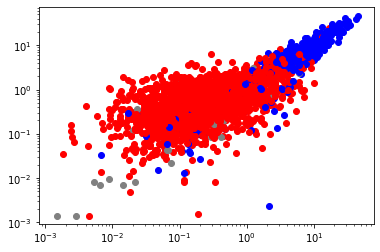

In [104]:
for i in np.arange(20):
    plt.scatter(x[i][2],y[i][2], color='gray')
    plt.scatter(x[i][0],y[i][0], color='r')
    plt.scatter(x[i][1],y[i][1], color='b')
    plt.yscale('log')
    plt.xscale('log')

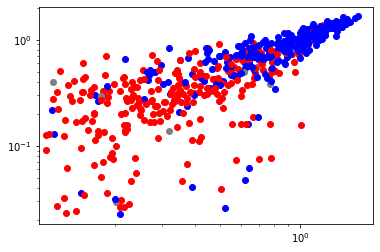

In [103]:
for i in np.arange(20):
    plt.scatter(np.log10(x[i][2]),np.log10(y[i][2]), color='gray')
    plt.scatter(np.log10(x[i][0]),np.log10(y[i][0]), color='r')
    plt.scatter(np.log10(x[i][1]),np.log10(y[i][1]), color='b')
    plt.yscale('log')
    plt.xscale('log')